## 2. Polynomial Regression

Polynomial Regression is a form of **linear regression** where the relationship between the independent variable(s) and the dependent variable is modeled as an **nth-degree polynomial.**

Polynomial Regression is a type of regression analysis used when the relationship between the independent variable(s) and the dependent variable is non-linear.

 While linear regression fits a straight line to the data, polynomial regression fits a curved line by introducing higher-degree polynomial terms.

This approach is particularly useful when data exhibits a curvilinear trend—something a straight line cannot adequately capture.


The key idea behind polynomial regression is that by introducing additional polynomial terms, we can capture more complex patterns in the data. This flexibility enables us to model relationships that cannot be adequately described by a straight line.

### Why Use Polynomial Regression?

 * In some scenarios, data does not follow a straight-line (linear) pattern. For example, in chemical synthesis or finance, the relationship between variables can be more complex.

 * A scatterplot of residuals from a linear model applied to curvilinear data typically reveals systematic patterns—suggesting that a linear model is inappropriate.

 * Polynomial regression offers more flexibility by fitting curves that adapt to these patterns.

**Unlike linear regression, polynomial regression includes interaction and higher-order terms, which can violate the assumption of independence among predictors.**

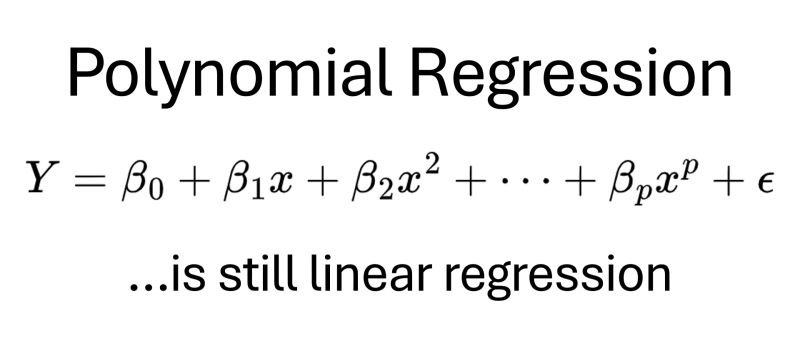


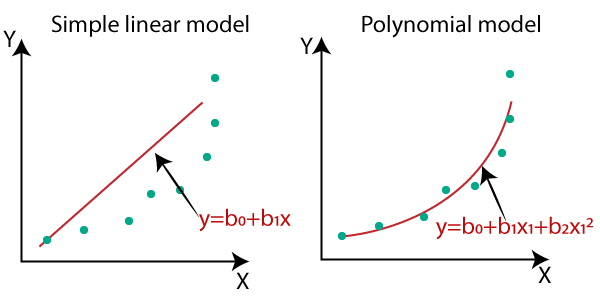

### Working Mechanism

* Start with linear regression.

* Add polynomial terms `(e.g., x^2, x^3)` to the dataset as additional features.

* Fit a linear model on these new features using least squares or other optimization.

* Use the model to predict values on new or test data.

### Hyperparameters & Tuning

| Hyperparameter        | Description                                            | Tuning Strategy                                |
|------------------------|--------------------------------------------------------|------------------------------------------------|
| `degree`              | Degree of polynomial features                          | Use cross-validation (e.g., `GridSearchCV`)    |
| `fit_intercept`       | Whether to calculate intercept (β₀)                    | Typically `True`                               |
| `normalize`           | Normalize input features before regression             | Try both `True` / `False`, especially for high-degree models |
| `reg_param` (for Ridge/Lasso) | Regularization strength (`alpha`)               | Tune using cross-validation or grid search     |


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load dataset
df = pd.read_csv('Melbourne_housing_FULL.csv') 
df = df[['Distance', 'Price']].dropna()

X = df[['Distance']].values
y = df['Price'].values

# Polynomial Transformation
poly = PolynomialFeatures(degree=2)  # try degree=3 or 4 for experimentation
X_poly = poly.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Model Training
model = LinearRegression()
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)

# Evaluation Metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
rss = np.sum((y_test - y_pred) ** 2)

print(f"MAE:  {mae:.2f}")
print(f"MSE:  {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²:   {r2:.2f}")
print(f"RSS:  {rss:.2f}")


MAE:  430805.62
MSE:  374143216687.74
RMSE: 611672.48
R²:   0.05
RSS:  2039080530948203.50


### Advantages of Polynomial Regression

  * **Flexibility:** Effectively models both linear and complex nonlinear relationships, making it suitable for varied real-world data patterns.

  * **Higher Accuracy:** Enables better predictive performance than simple linear regression by capturing intricate data trends.

  * **Interpretability:** The model's coefficients offer insights into variable relationships, aiding in data understanding.

### Limitations of Polynomial Regression

   * **Overfitting Risk:** High-degree polynomials may overfit training data and perform poorly on unseen data without proper regularization.

   * **Increased Complexity:** Computational cost grows with polynomial degree, which may not always yield better results.

   * **Data Dependency:** Requires ample data for reliable estimation, especially with higher-degree terms; small datasets may lead to unreliable models.



---

## 3. Lasso Regression (Least Absolute Shrinkage and Selection Operator)

 * Lasso is a regularization technique used to reduce overfitting in regression models by penalizing large coefficients. What makes Lasso special is that it can shrink some coefficients to zero, effectively performing feature selection.

 * Think of Lasso as trying to reduce the complexity of the model by ignoring less important variables.

###  Mathematical Foundation:
The cost function for Lasso adds an L1 penalty (sum of absolute values of coefficients) to the loss:

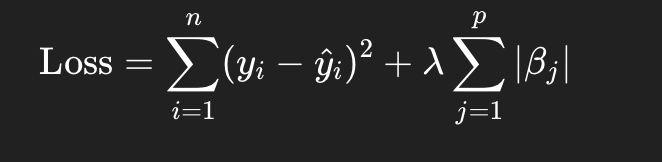


* The`λ (lambda)` is a regularization parameter that controls the amount of shrinkage.

* As `λ` increases, more coefficients are pushed toward zero.


## 4.ElasticNet Regression

 * ElasticNet combines L1 (Lasso) and L2 (Ridge) penalties. It is useful when:

   * You have many correlated features.

    * You want the benefit of both Lasso's sparsity and Ridge's stability.
ElasticNet is like using Ridge and Lasso together, balancing between coefficient shrinking and zeroing out.

### Mathematical Foundation:

  The cost function for ElasticNet is:

  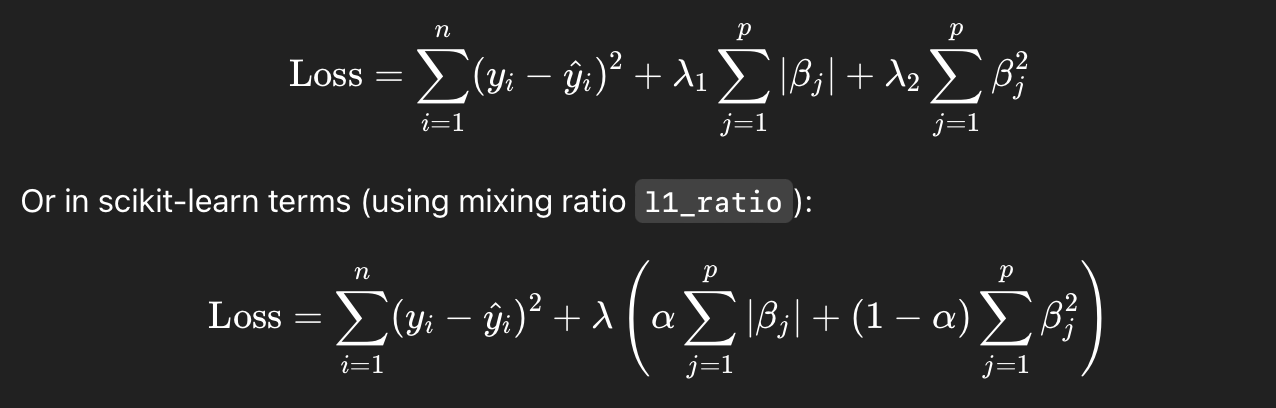

| **Aspect**              | **Lasso**                           | **ElasticNet**                               |
|-------------------------|-------------------------------------|----------------------------------------------|
| **Penalty**             | L1 (Absolute values)                | L1 + L2 (Combined penalty)                   |
| **Feature selection**   | Can remove features (set to 0)      | Can remove and shrink features               |
| **Works well when**     | Few relevant variables              | Many correlated variables                    |
| **Instability**         | May be unstable with collinearity   | More stable due to L2 term                   |
| **Regularization terms**| λ                                   | λ + α (mixing ratio)                         |
